In [168]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import math
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from tensorflow import keras
import seaborn as sns
color_pal = sns.color_palette()
from sklearn.metrics import mean_squared_error
import xgboost as xgb
plt.style.use('fivethirtyeight')

In [169]:
df=pd.read_excel("hourly.xlsx")
df=df.dropna()
df

,Symbol,Sample Time,Open,High,Low,Close,Volume
0,AAPL,2021-01-04 14:30:00,133.520004,133.611603,130.380005,131.053604,27653145
1,AAPL,2021-01-04 15:30:00,131.054993,131.309998,129.399994,129.895004,20134055
2,AAPL,2021-01-04 16:30:00,129.889893,130.089996,126.760002,128.250000,23694210
3,AAPL,2021-01-04 17:30:00,128.246902,129.110001,127.630096,129.039795,14745063
4,AAPL,2021-01-04 18:30:00,129.039993,129.199997,128.595001,128.960007,10861778
...,...,...,...,...,...,...,...
3219,AAPL,2022-10-31 15:30:00,153.300003,154.149902,152.820007,153.925003,9548395
3220,AAPL,2022-10-31 16:30:00,153.839996,154.119995,153.089996,153.949997,6994913
3221,AAPL,2022-10-31 17:30:00,153.969894,154.089996,153.289993,153.770004,6334035
3222,AAPL,2022-10-31 18:30:00,153.770004,154.240005,152.619995,153.339996,8775568


In [170]:
df=df.drop(['Symbol'], axis=1)
df

df.rename(columns = {'Sample Time':'datetime'}, inplace = True)
# data = (data-data.min())/(data.max()-data.min())
# data

In [171]:
df

,datetime,Open,High,Low,Close,Volume
0,2021-01-04 14:30:00,133.520004,133.611603,130.380005,131.053604,27653145
1,2021-01-04 15:30:00,131.054993,131.309998,129.399994,129.895004,20134055
2,2021-01-04 16:30:00,129.889893,130.089996,126.760002,128.250000,23694210
3,2021-01-04 17:30:00,128.246902,129.110001,127.630096,129.039795,14745063
4,2021-01-04 18:30:00,129.039993,129.199997,128.595001,128.960007,10861778
...,...,...,...,...,...,...
3219,2022-10-31 15:30:00,153.300003,154.149902,152.820007,153.925003,9548395
3220,2022-10-31 16:30:00,153.839996,154.119995,153.089996,153.949997,6994913
3221,2022-10-31 17:30:00,153.969894,154.089996,153.289993,153.770004,6334035
3222,2022-10-31 18:30:00,153.770004,154.240005,152.619995,153.339996,8775568


In [172]:
# data=df.drop(['datetime'], axis=1)
# data = (data-data.min())/(data.max()-data.min())
# df = pd.concat((data, df.datetime), 1)

In [173]:
df=df.set_index('datetime')
df

,Open,High,Low,Close,Volume
datetime,,,,,
2021-01-04 14:30:00,133.520004,133.611603,130.380005,131.053604,27653145
2021-01-04 15:30:00,131.054993,131.309998,129.399994,129.895004,20134055
2021-01-04 16:30:00,129.889893,130.089996,126.760002,128.250000,23694210
2021-01-04 17:30:00,128.246902,129.110001,127.630096,129.039795,14745063
2021-01-04 18:30:00,129.039993,129.199997,128.595001,128.960007,10861778
...,...,...,...,...,...
2022-10-31 15:30:00,153.300003,154.149902,152.820007,153.925003,9548395
2022-10-31 16:30:00,153.839996,154.119995,153.089996,153.949997,6994913
2022-10-31 17:30:00,153.969894,154.089996,153.289993,153.770004,6334035


In [174]:
data=df
df=df.drop(['Open','Close','Volume','Low'], axis=1)
df

,High
datetime,
2021-01-04 14:30:00,133.611603
2021-01-04 15:30:00,131.309998
2021-01-04 16:30:00,130.089996
2021-01-04 17:30:00,129.110001
2021-01-04 18:30:00,129.199997
...,...
2022-10-31 15:30:00,154.149902
2022-10-31 16:30:00,154.119995
2022-10-31 17:30:00,154.089996


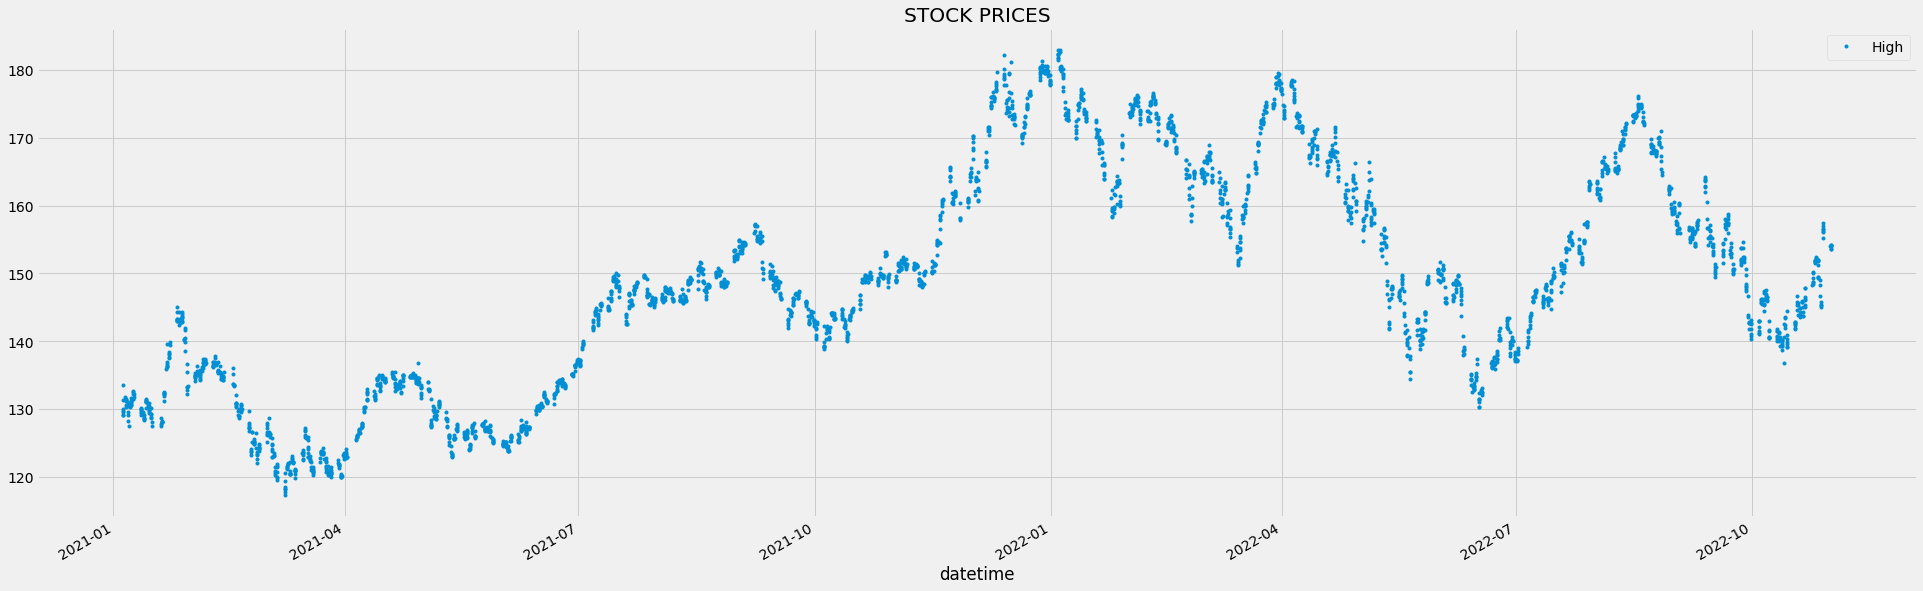

In [175]:
df.plot(style='.',
        figsize=(30, 10),
        color=color_pal[0],
        title='STOCK PRICES')
plt.show()


<AxesSubplot:ylabel='Frequency'>

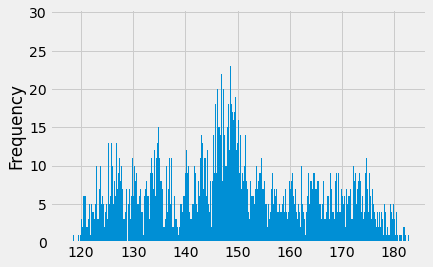

In [176]:
df['High'].plot(kind='hist', bins=500)

<AxesSubplot:title={'center':'Outliers'}, xlabel='datetime'>

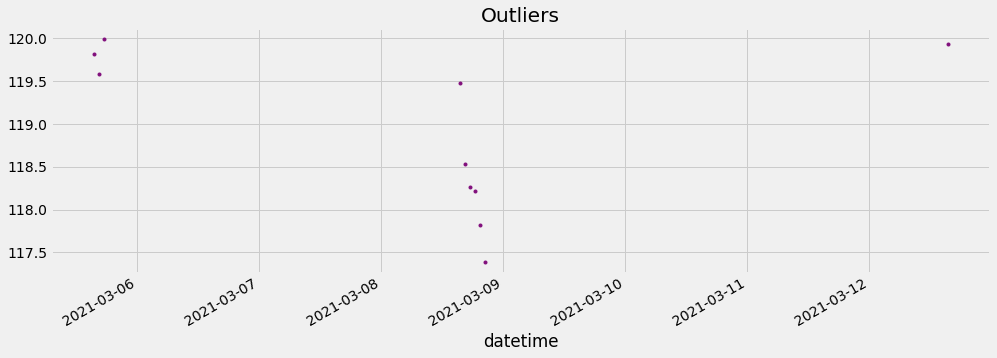

In [177]:
df.query('High < 120')['High'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [178]:
train=df.loc[df.index<'2022-04-01 14:30:00']
test=df.loc[df.index>='2022-04-01 14:30:00']

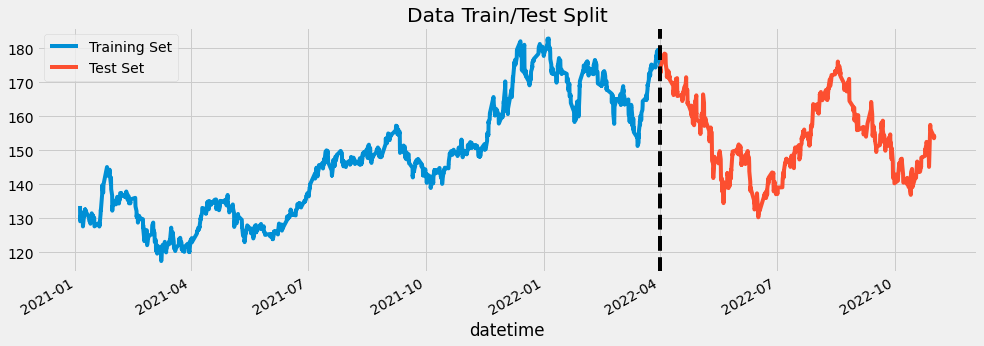

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-04-01 14:30:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [125]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=4, test_size=24*24*1, gap=1)
df = df.sort_index()

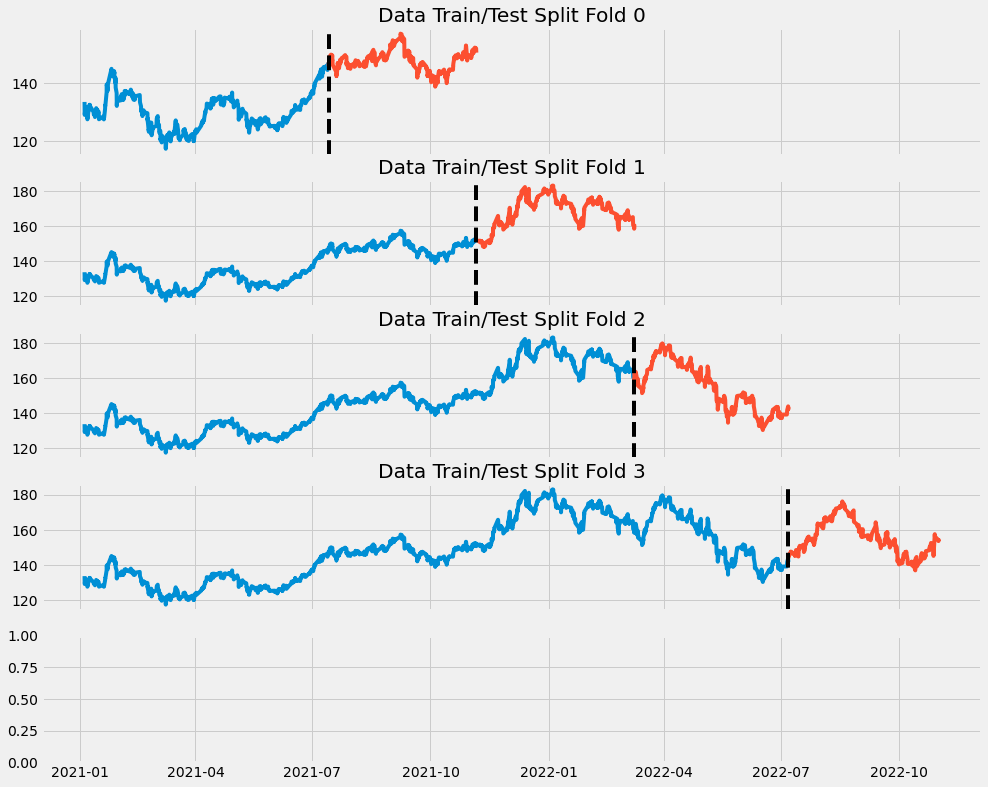

In [126]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['High'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['High'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

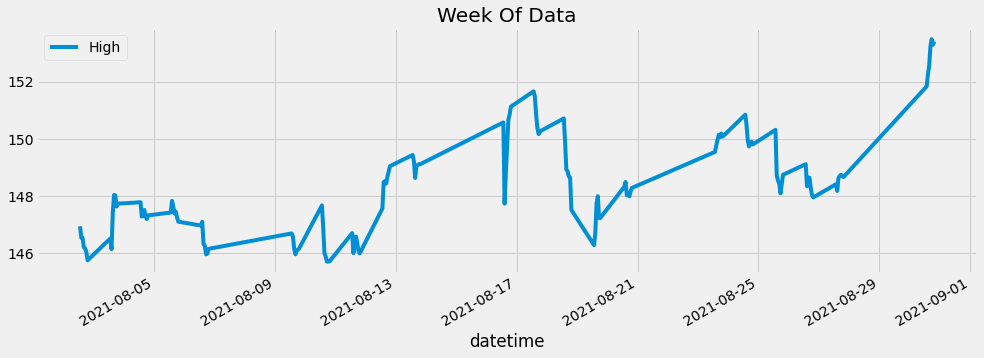

In [127]:
df.loc[(df.index > '2021-08-01') & (df.index < '2021-08-31')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [128]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [138]:
def add_lags(df):
    target_map = df['High'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('1 hours')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('7 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('31 days')).map(target_map)
    return df

In [139]:
df=create_features(df)
df = add_lags(df)

In [140]:
df.tail()

,High,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,
2022-10-31 15:30:00,154.149902,15,0,4,10,2022,304,31,44,153.559998,148.820007,142.740005
2022-10-31 16:30:00,154.119995,16,0,4,10,2022,304,31,44,154.149902,148.729996,141.759995
2022-10-31 17:30:00,154.089996,17,0,4,10,2022,304,31,44,154.119995,149.365005,141.159897
2022-10-31 18:30:00,154.240005,18,0,4,10,2022,304,31,44,154.089996,150.229996,140.850006
2022-10-31 19:30:00,153.600006,19,0,4,10,2022,304,31,44,154.240005,150.039993,140.289993


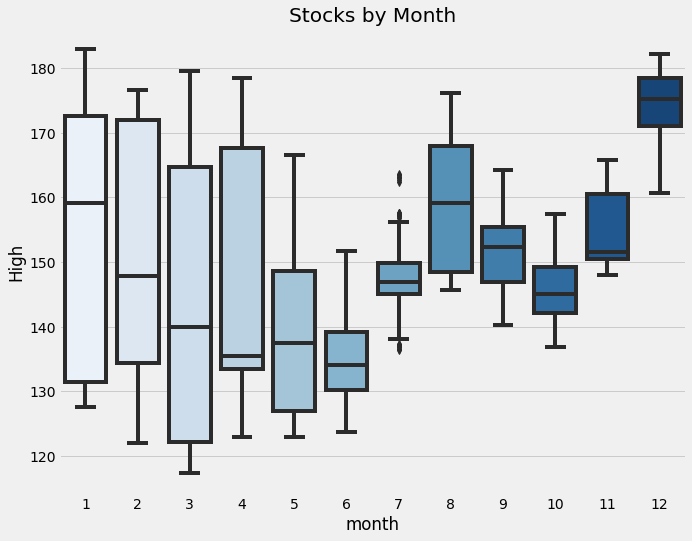

In [141]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='High', palette='Blues')
ax.set_title('Stocks by Month')
plt.show()

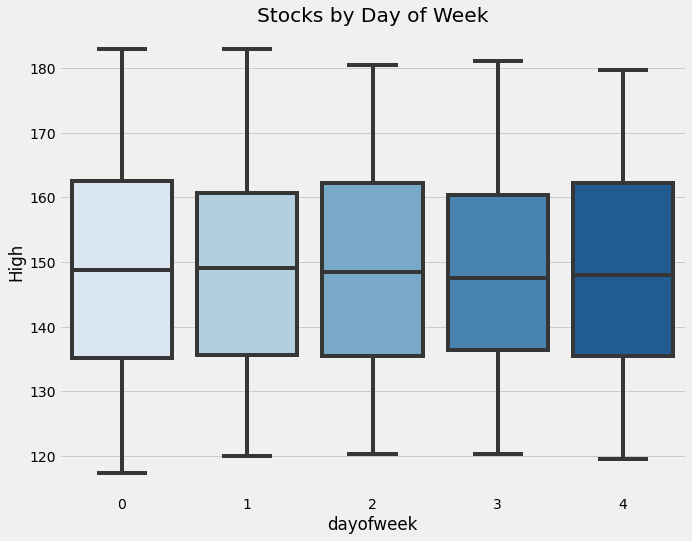

In [142]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='High', palette='Blues')
ax.set_title('Stocks by Day of Week')
plt.show()

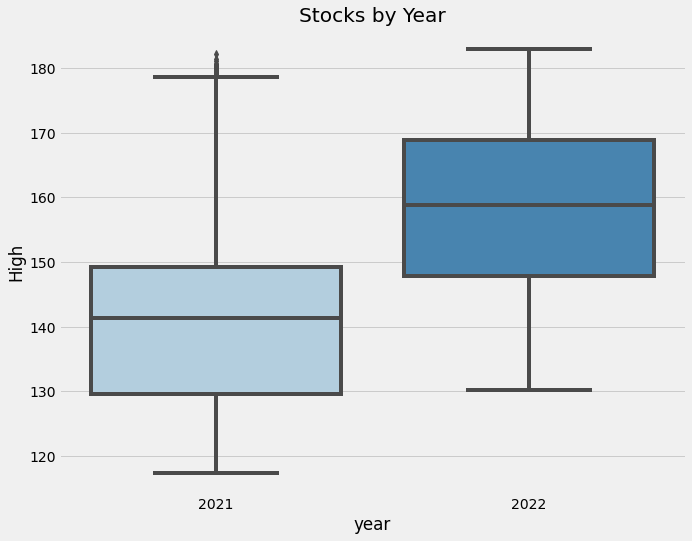

In [143]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='High', palette='Blues')
ax.set_title('Stocks by Year')
plt.show()

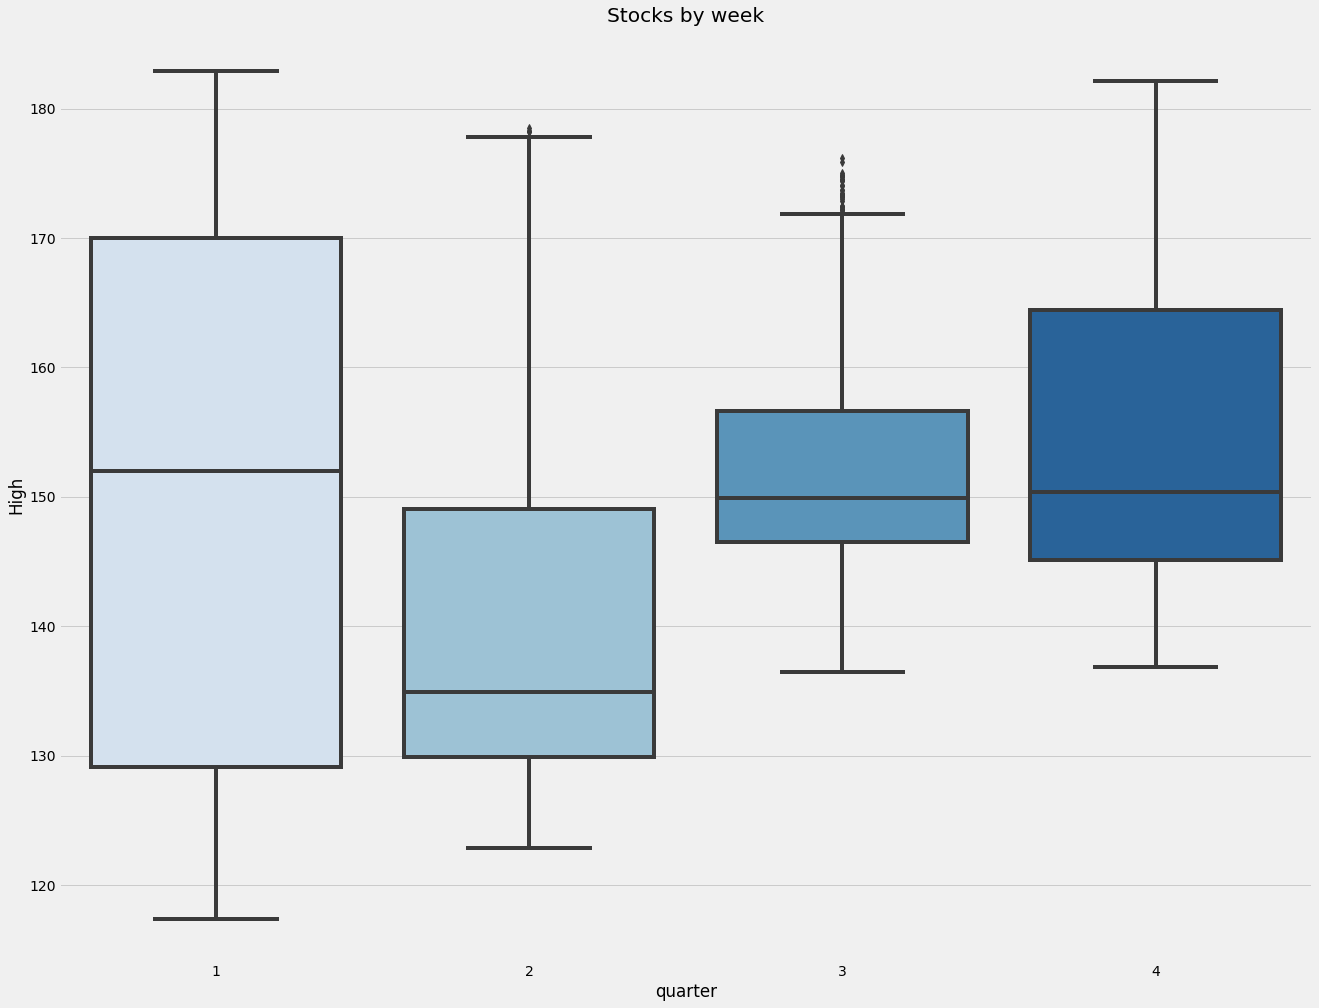

In [144]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(data=df, x='quarter', y='High', palette='Blues')
ax.set_title('Stocks by week')
plt.show()

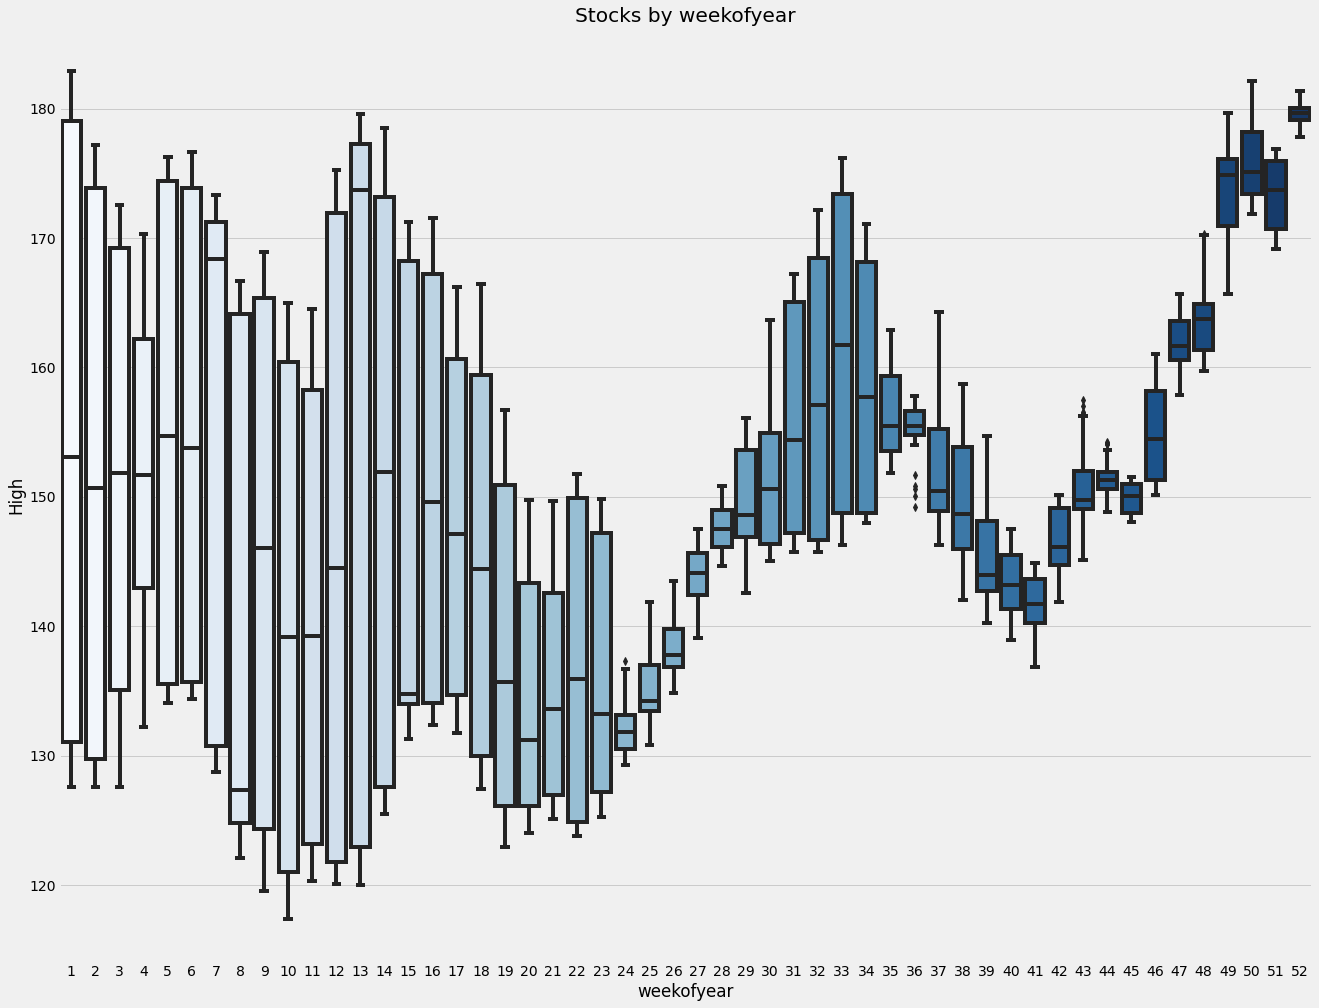

In [145]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(data=df, x='weekofyear', y='High', palette='Blues')
ax.set_title('Stocks by weekofyear')
plt.show()

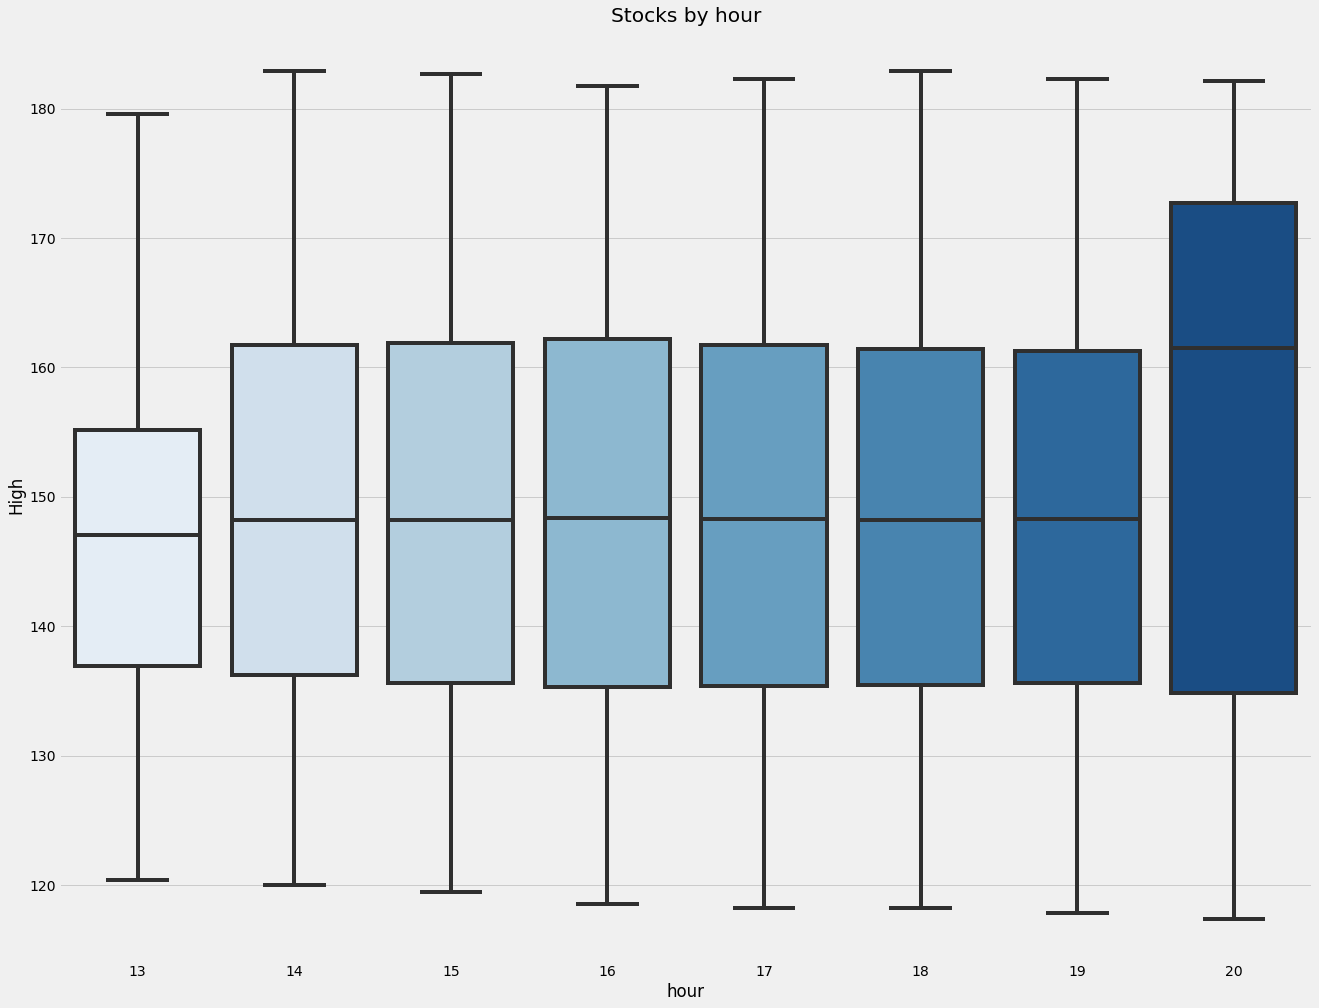

In [146]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(data=df, x='hour', y='High', palette='Blues')
ax.set_title('Stocks by hour')
plt.show()

In [148]:
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=24)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'High'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[02:09:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:134.45314	validation_1-rmse:160.67368
[100]	validation_0-rmse:49.42337	validation_1-rmse:69.26165
[200]	validation_0-rmse:18.28082	validation_1-rmse:34.68409
[300]	validation_0-rmse:6.92144	validation_1-rmse:22.77041
[400]	validation_0-rmse:2.89897	validation_1-rmse:18.99204
[500]	validation_0-rmse:1.62778	validation_1-rmse:17.82801
[600]	validation_0-rmse:1.21318	validation_1-rmse:17.45081
[700]	validation_0-rmse:1.04900	validation_1-rmse:17.25019
[777]	validation_0-rmse:0.98612	validation_1-rmse:17.24050
[02:09:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139.76778	validation_1-rmse:166.41102
[100]	validation_0-rmse:51.39328	validation_1-rmse:8

In [149]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 10.7670
Fold scores:[17.219183490687673, 25.79764042002079, 5.287219667357133, 2.814295744370799, 2.716424883928024]


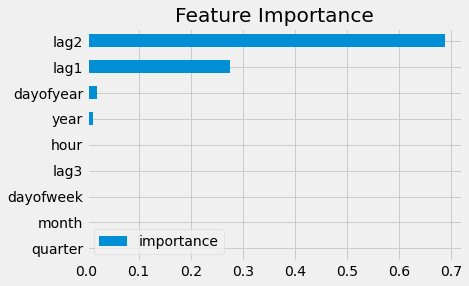

In [150]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

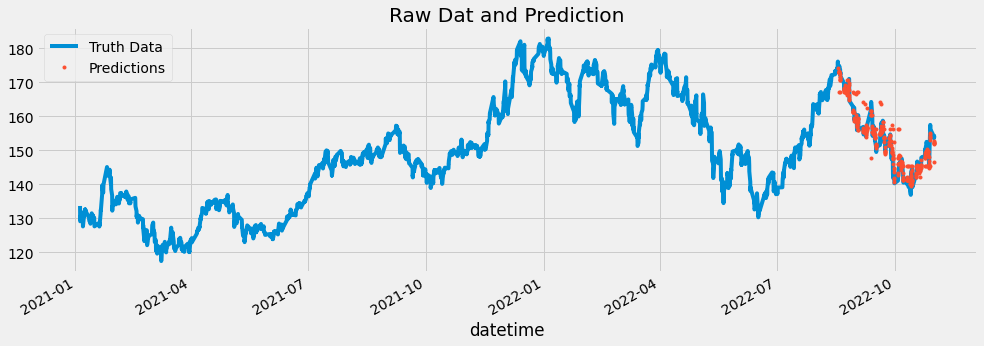

In [151]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['High']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [152]:
score = np.sqrt(mean_squared_error(test['High'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2.72


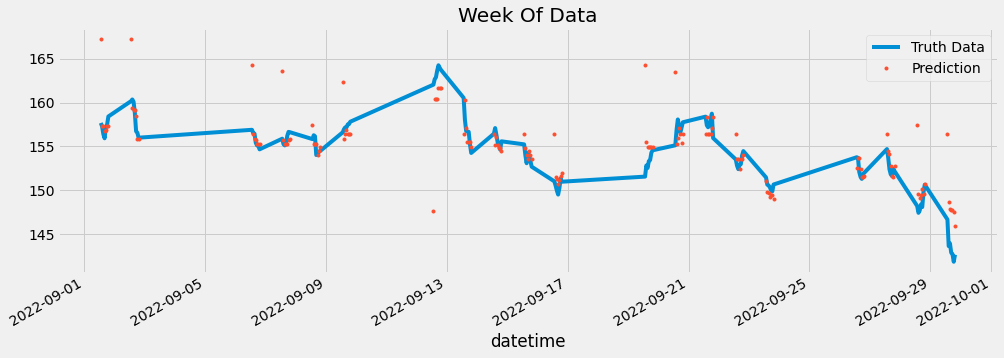

In [157]:
ax = df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-30')]['High'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-30')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [158]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2022-09-29    5.352280
2022-10-03    4.928186
2022-09-12    4.184378
2022-10-28    3.662029
2022-10-04    3.304467
2022-09-19    3.137852
2022-10-25    2.822736
2022-10-31    2.542300
2022-09-30    2.462409
2022-08-18    2.404763
Name: error, dtype: float64

In [159]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2022-10-19    0.335645
2022-09-14    0.575551
2022-08-26    0.633693
2022-09-26    0.658641
2022-10-27    0.680174
2022-10-18    0.722752
2022-10-17    0.746192
2022-09-08    0.762464
2022-10-06    0.788701
2022-09-15    0.814606
Name: error, dtype: float64

In [160]:
df.index.max()

Timestamp('2022-10-31 19:30:00')

In [161]:
future = pd.date_range('2020-12-31','2021-12-01', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [162]:
future_w_features = df_and_future.query('isFuture').copy()

In [163]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

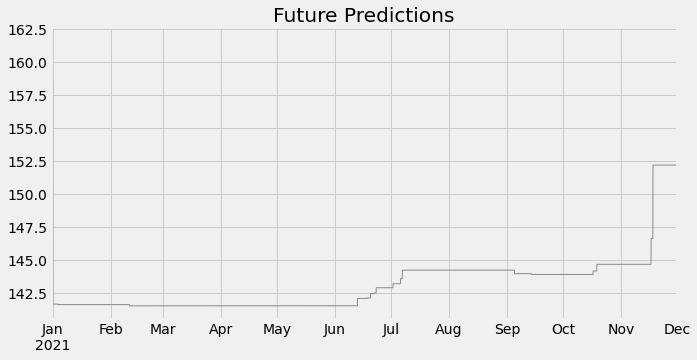

In [164]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()